# 공공 인공지능 Open API 활용

In [2]:
with open('etriaikey.txt') as kfile:
    etri_key = kfile.read()

In [3]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [18]:
import os
img_file = '../CNN/images/eagle.jpg'
_, image_type = os.path.splitext(img_file)
image_type.replace('.','')
image_type

'.jpg'

In [20]:
image_type = 'jpg' if image_type == '.jfif' else image_type[1:]
image_type

'jpg'

In [21]:
with open(img_file, 'rb') as file:
    image_contents = base64.b64encode(file.read()).decode("utf8")

In [22]:
request_json = {
    "access_key": etri_key,
    "argument": {
        "type": image_type,
        "file": image_contents
    }
}

In [23]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [24]:
print("[responseCode] " + str(response.status))

[responseCode] 200


In [25]:
response.data

b'{"result":0,"return_object":{"data":[{"class":"bird","confidence":"0.998572","x":"18","y":"28","width":"180","height":"142"}]}}'

In [26]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'bird',
    'confidence': '0.998572',
    'x': '18',
    'y': '28',
    'width': '180',
    'height': '142'}]}}

In [27]:
obj_list = result['return_object']['data']
obj_list[0]

{'class': 'bird',
 'confidence': '0.998572',
 'x': '18',
 'y': '28',
 'width': '180',
 'height': '142'}

### 시각화 

In [29]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt 
%matplotlib inline

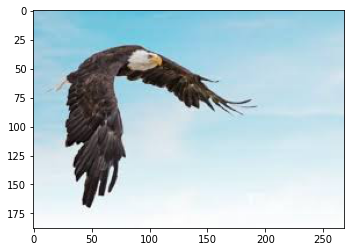

In [30]:
image = Image.open(img_file)
plt.imshow(image)
plt.show()

In [31]:
draw = ImageDraw.Draw(image)
obj = obj_list[0]
name = obj['class']
x = int(obj['x'])
y = int(obj['y'])
w = int(obj['width'])
h = int(obj['height'])
draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf',20), fill=(255,0,0))
draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)

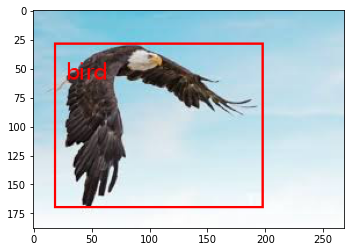

In [32]:
plt.imshow(image)
plt.show()